In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
import sys
import os

# Add the directory containing the Trackers module
sys.path.append(r'C:/Users/dimaag/Documents/Python Class/Projects/Football analysis')

from Trackers import Tracker
from Utils import read_video,save_video 
import cv2

In [2]:
# video_frames=read_video('C://Users//dimaag//Documents//Python Class//Projects//Football analysis//input_video//Football.mp4')


# tracker = Tracker('C://Users//dimaag//Documents//Python Class//Projects//Football analysis//Models//best.pt')
# tracks= tracker.get_object_track(video_frames,read_from_stub=True,stub_path=r'C:\Users\dimaag\Documents\Python Class\Projects\Football analysis\stubs\track_stub.pkl')

# for track_id,player in tracks['players'][0].items():
#     bbox = player['bbox']
#     frame =video_frames[1000]

#     cropped_image = frame[int(bbox[1]):int(bbox[3]),int(bbox[0]):int(bbox[2])]
#     image = cv2.imread(cropped_image)
#     plt.imshow(image)
#     plt.show()
#     cv2.imwrite(f'Output_videos/cropped_image1.jpg',cropped_image)
    
#     break

In [3]:
image_path = '../output_videos/cropped_image1.jpg'
image = cv2.imread(image_path)
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

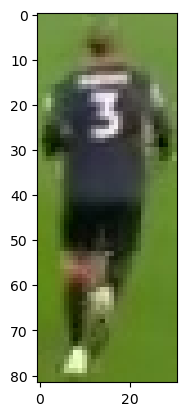

In [4]:
plt.imshow(image)
plt.show()

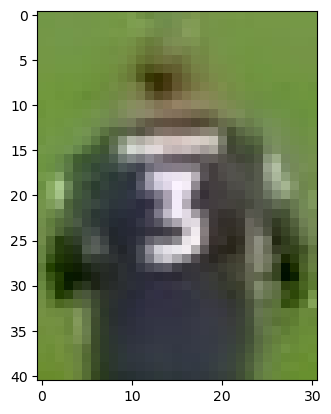

In [5]:
top_half = image[0:int(image.shape[0]/2),:]
plt.imshow(top_half)
plt.show()

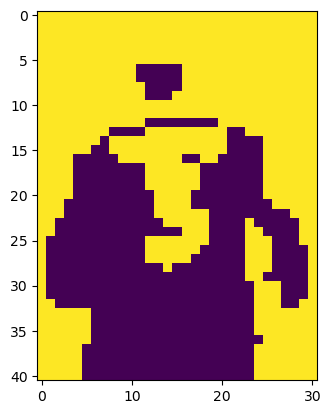

In [6]:
image_2d=top_half.reshape(-1,3)

kmeans=KMeans(n_clusters=2,random_state=0)
kmeans.fit(image_2d)

labels=kmeans.labels_

cluster_image= labels.reshape(top_half.shape[0],top_half.shape[1])

plt.imshow(cluster_image)
plt.show()


In [7]:
corner_cluster = [cluster_image[0,0],cluster_image[0,-1],cluster_image[-1,0],cluster_image[-1,-1]]
non_player_cluster=max(set(corner_cluster),key=corner_cluster.count)
print(non_player_cluster)

1


In [8]:
player_cluster=1-non_player_cluster
print(player_cluster)

0


In [9]:
kmeans.cluster_centers_[player_cluster]

array([     57.923,      64.452,      54.368])